In [78]:
import numpy as np
import pandas as pd
import cv2
import os
import random
from skimage import io
from PIL import Image 

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [80]:
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        #zoom_range=0.01,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

yes_image_path = 'C:/Users/anvit/OneDrive/Desktop/Project_1/brain_tumor_dataset/yes'
yes_count = 5
for img in os.listdir(yes_image_path):
    img = cv2.imread(yes_image_path + '\\' + img)
    img = img_to_array(img)
    img = cv2.resize(img, (256, 256))
    img = img.reshape((1,) + img.shape)
    
    i = 0
    for batch in datagen.flow(img, batch_size=1,save_to_dir='C:/Users/anvit/OneDrive/Desktop/Project_1/brain_tumor_dataset/yes_aug', save_prefix='aug_', save_format='jpg'):
        i += 1
        if i > yes_count:
            break  # otherwise the generator would loop indefinitely

no_image_path = 'C:/Users/anvit/OneDrive/Desktop/Project_1/brain_tumor_dataset/no'
no_count = 8
for img in os.listdir(no_image_path):
    img = cv2.imread(no_image_path + '\\' + img)
    img = img_to_array(img)
    img = cv2.resize(img, (256, 256))
    img = img.reshape((1,) + img.shape)
    
    i = 0
    for batch in datagen.flow(img, batch_size=1,save_to_dir='C:/Users/anvit/OneDrive/Desktop/Project_1/brain_tumor_dataset/no_aug', save_prefix='aug_', save_format='jpg'):
        i += 1
        if i > no_count:
            break  # otherwise the generator would loop indefinitely

In [83]:
yes_images = os.listdir('C:/Users/anvit/OneDrive/Desktop/Project_1/brain_tumor_dataset/yes_aug/')
no_images = os.listdir('C:/Users/anvit/OneDrive/Desktop/Project_1/brain_tumor_dataset/no_aug/')
data = np.concatenate([yes_images, no_images])
len(data) == len(yes_images) + len(no_images)

True

In [84]:
target_pos = np.full(len(yes_images), 1)
target_neg = np.full(len(no_images), 0)
target_data = np.concatenate([target_pos, target_neg])
len(target_data)==len(target_pos) + len(target_neg)

True

In [85]:
split_data = []
for image in yes_images:
    img = cv2.imread('C:/Users/anvit/OneDrive/Desktop/Project_1/brain_tumor_dataset/yes_aug/' + image)
    face = cv2.resize(img, (256, 256))
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    split_data.append(face)
    
for image in no_images:
    img = cv2.imread('C:/Users/anvit/OneDrive/Desktop/Project_1/brain_tumor_dataset/no_aug/' + image)
    face = cv2.resize(img, (256, 256))
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    split_data.append(face)

d = np.squeeze(split_data)

# normalize data
d = d.astype('float32')
d /= 255

In [89]:
d = d.reshape((d.shape[0],3*256*256))

d[0:5]

In [92]:
target_data

array([1, 1, 1, ..., 0, 0, 0])

# SVM Classifier

In [124]:
from sklearn.model_selection import train_test_split

#Import svm model
from sklearn import svm

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(d, target_data, test_size=0.3,random_state=109) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Precision means the percentage of your results which are relevant. 
# Recall refers to the percentage of total relevant results correctly classified by your algorithm .
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred.round())

Accuracy: 0.6228571428571429
Precision: 0.6323529411764706
Recall: 0.6370370370370371


array([[155, 100],
       [ 98, 172]], dtype=int64)

# Artificial Neural Network 

In [126]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# model.add(Dense(4, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [127]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                2359308   
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 2,359,421
Trainable params: 2,359,421
Non-trainable params: 0
_________________________________________________________________


[array([[-0.00283215,  0.00296249, -0.0006153 , ..., -0.0014063 ,
          0.0002464 ,  0.00292327],
        [-0.00254285, -0.00187897, -0.00240497, ..., -0.00464575,
         -0.00310043,  0.00244491],
        [ 0.00260958, -0.00031329,  0.00370067, ...,  0.00403761,
          0.00126235, -0.00355883],
        ...,
        [-0.00510662, -0.00543411, -0.00522314, ...,  0.00274838,
          0.00184199, -0.00510768],
        [ 0.0002711 , -0.00196035,  0.00526764, ...,  0.00285973,
         -0.00233865,  0.00110698],
        [ 0.00550295, -0.00408611, -0.0026018 , ...,  0.00241917,
          0.00406503,  0.00040266]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.45869792, -0.34199947, -0.26047167,  0.52022564, -0.10104331,
          0.04562664, -0.41777444, -0.43314168],
        [ 0.3402555 ,  0.26241308,  0.5203072 , -0.51215965,  0.20781642,
         -0.29071435,  0.05908096,  0.2548346 ],
        [ 0.09723955, -0.21254393, -0.3

In [128]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1224/1224 [==============================] - 7s 6ms/step - loss: 3.3466 - accuracy: 0.5662
Epoch 2/100
1224/1224 [==============================] - 4s 4ms/step - loss: 0.7724 - accuracy: 0.6863
Epoch 3/100
1224/1224 [==============================] - 4s 3ms/step - loss: 0.5615 - accuracy: 0.7181
Epoch 4/100
1224/1224 [==============================] - 4s 3ms/step - loss: 0.6788 - accuracy: 0.6871
Epoch 5/100
1224/1224 [==============================] - 4s 3ms/step - loss: 0.6082 - accuracy: 0.7214
Epoch 6/100
1224/1224 [==============================] - 4s 3ms/step - loss: 0.5210 - accuracy: 0.7549
Epoch 7/100
1224/1224 [==============================] - 4s 4ms/step - loss: 0.5867 - accuracy: 0.7157
Epoch 8/100
1224/1224 [==============================] - 4s 3ms/step - loss: 0.4746 - accuracy: 0.7770
Epoch 9/100
1224/1224 [==============================] - 4s 3ms/step - loss: 0.5035 - accuracy: 0.7672: 1s - loss: 0.4421 - accu
Epoch 10/100
1224/1224 [=======================

In [129]:
y_pred = model.predict(X_test)

In [130]:
score = model.evaluate(X_test, y_test,verbose=1)

525/525 [==============================] - 1s 1ms/step


In [131]:
print(score)

[1.7252053778512138, 0.6228571534156799]


In [132]:
history = model.fit(X_train, y_train, epochs=250, batch_size=64, verbose=1, validation_split=0.2)

Train on 979 samples, validate on 245 samples
Epoch 1/250
979/979 [==============================] - 3s 3ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 2/250
979/979 [==============================] - 3s 3ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 3/250
979/979 [==============================] - 3s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 4/250
979/979 [==============================] - 4s 4ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 5/250
979/979 [==============================] - 3s 3ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 6/250
979/979 [==============================] - 3s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 7/250
979/979 [==============================] - 3s 3ms/step - loss: 0.0057 - accuracy: 1.

In [135]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred.round())

array([[169,  86],
       [112, 158]], dtype=int64)

In [136]:
precision_score(y_test, y_pred.round())

0.6475409836065574

In [138]:
recall_score(y_test, y_pred.round())

0.5851851851851851

In [112]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train, y_train, validation_split = 0.1, epochs= 100, batch_size=64)

Train on 1101 samples, validate on 123 samples
Epoch 1/100
1101/1101 [==============================] - 3s 3ms/step - loss: 7.5574e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/100
1101/1101 [==============================] - 3s 3ms/step - loss: 7.0950e-04 - accuracy: 1.0000 - val_loss: 8.4512e-04 - val_accuracy: 1.0000
Epoch 3/100
1101/1101 [==============================] - 3s 2ms/step - loss: 6.9273e-04 - accuracy: 1.0000 - val_loss: 8.8300e-04 - val_accuracy: 1.0000
Epoch 4/100
1101/1101 [==============================] - 3s 2ms/step - loss: 6.8202e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/100
1101/1101 [==============================] - 3s 3ms/step - loss: 6.4951e-04 - accuracy: 1.0000 - val_loss: 9.3096e-04 - val_accuracy: 1.0000
Epoch 6/100
1101/1101 [==============================] - 3s 2ms/step - loss: 6.3407e-04 - accuracy: 1.0000 - val_loss: 9.0093e-04 - val_accuracy: 1.0000
Epoch 7/100
1101/1101 [====================

KeyError: 'acc'

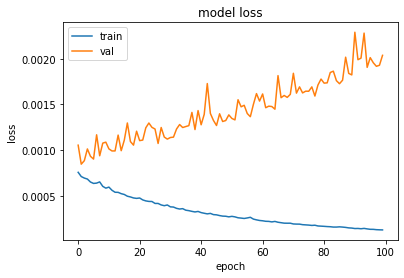

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()